In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

In [ ]:
DATA_PATH = '/content/gdrive/My Drive/DACON/north_pole/data/train.csv'
DIR_PATH = '/content/gdrive/My Drive/DACON/north_pole/data/'
DIR_TRAIN_PATH = '/content/gdrive/My Drive/DACON/north_pole/data/train/'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import os
%matplotlib inline

print(os.getcwd())

gc.enable()

#1. Data Load

In [ ]:
train = pd.read_csv(DIR_PATH + 'train.csv')
submission = pd.read_csv(DIR_PATH +'sample_submission.csv')

In [ ]:
data = np.load(DIR_TRAIN_PATH+train['file_nm'][2])

#2. 데이터 시각화 : 해빙 /북극점 / 해안 /지면 /결측치

In [ ]:


fig = plt.figure(figsize =  (20, 50))
for iter in range(5):
    fig.add_subplot(1, 5, iter+1)
    plt.imshow(data[:, :, iter])
fig.show()

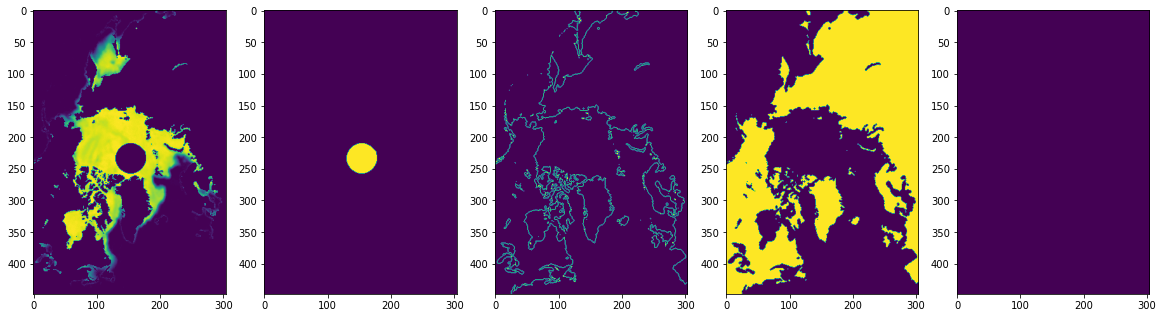

In [ ]:
# 해빙 / 북극점 / 해안 / 지면 / 결측치 데이터 분리
thaw = pd.DataFrame()
thaw_pluse_pole = pd.DataFrame() 

In [ ]:
total_data = []

for iter in range(0, train.shape[0]): # 78년 11월부터 데이터 추출
    data = np.load(DIR_TRAIN_PATH+train['file_nm'][iter]) 
    total_data.append(data)
    thaw = pd.concat([thaw, pd.DataFrame(data[:, :, 0].reshape(1, -1))], ignore_index = True)
    thaw_pluse_pole = pd.concat([thaw_pluse_pole, pd.DataFrame(data[:, :, 1].reshape(1, -1))], ignore_index = True) 

total_data = np.array(total_data)    

In [ ]:
#월별 해빙농도의 합 계산
thaw_sum = []
thaw_sum = np.array(thaw.sum(axis=1))

#3. 해빙농도 합의 변화     

각 월별로 전체 지도의 해빙농도의 전체 합을 그래프로 그려서 변화 추세를 확인했다. 

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Thaw Changes over time (from 1979-01 to 2018-12)')
plt.plot(train['month'], thaw_sum)
plt.show()

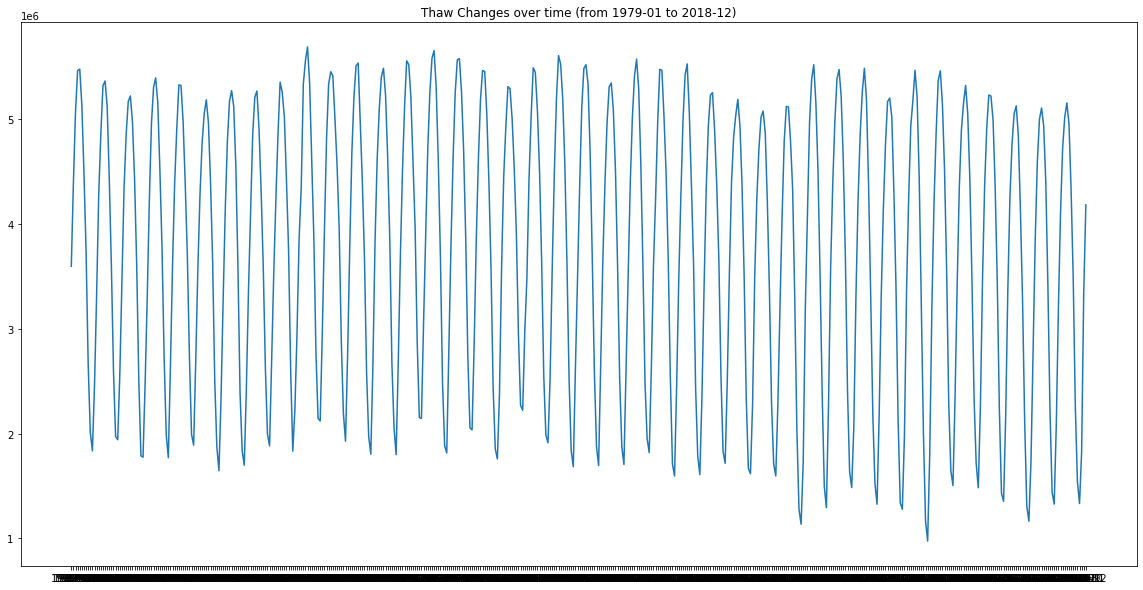

In [ ]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

#4. 계절성 제거 후 변화추이 확인  

기존의 그래프가 계절성으로 인해 해빙의 감소추이가 잘보이지 않아서 계절성을 제거하고 전체 변화를 확인하기 위한 12개월 이동평균그래프를 그렸다.

In [ ]:
moving_avg = moving_average_forecast(thaw_sum, 12)

plt.figure(figsize = (20,10))
plt.title('Thaw Moving Average over time (from 1978-11 to 2018-12)')
plt.plot(train['month'][12:], moving_avg)
plt.show()

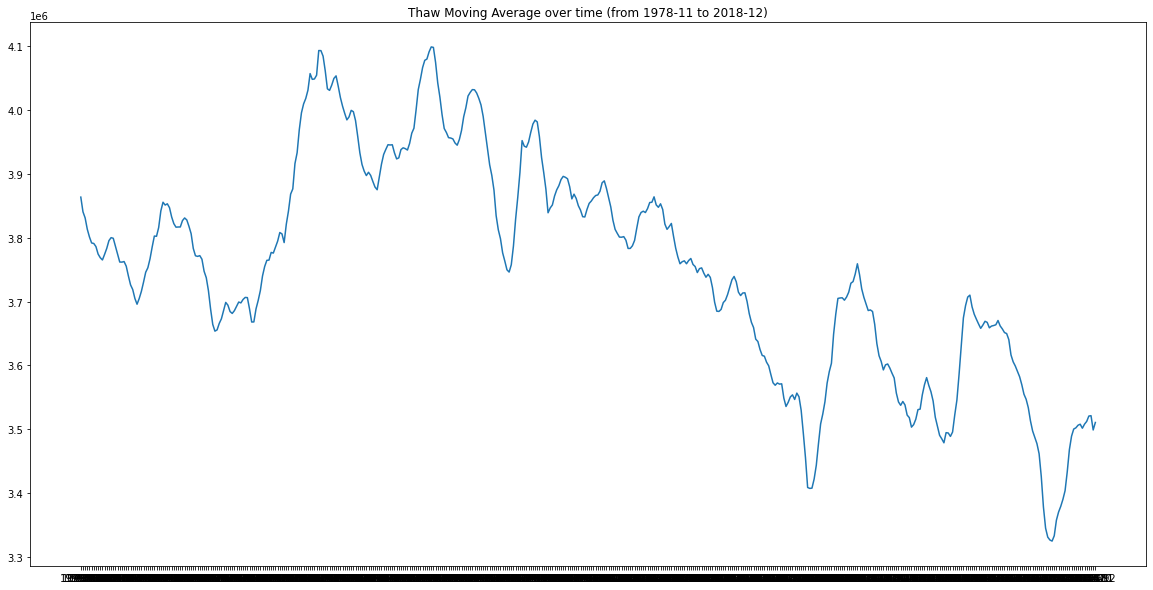

In [ ]:
total_data = np.array(total_data)
total_data.shape

#5. 빙하의 감소추세가 잘 보이지 않는 이유    

계절성을 제거해도 전체적으로 감소하고 있는것으로 보이긴 하지만 그 정도가 크지 않아 보인다. 그 이유는 북극점의 미관측영역이 과거로 갈수록 커지기 때문에 과거의 데이터의 합을 감소시키기 때문이다.

In [ ]:
fig = plt.figure(figsize =  (20, 50))
for iter in range(0, total_data.shape[0]):
    fig.add_subplot(41, 12, iter+1)
    plt.imshow(total_data[iter, :, :, 1])
fig.show()

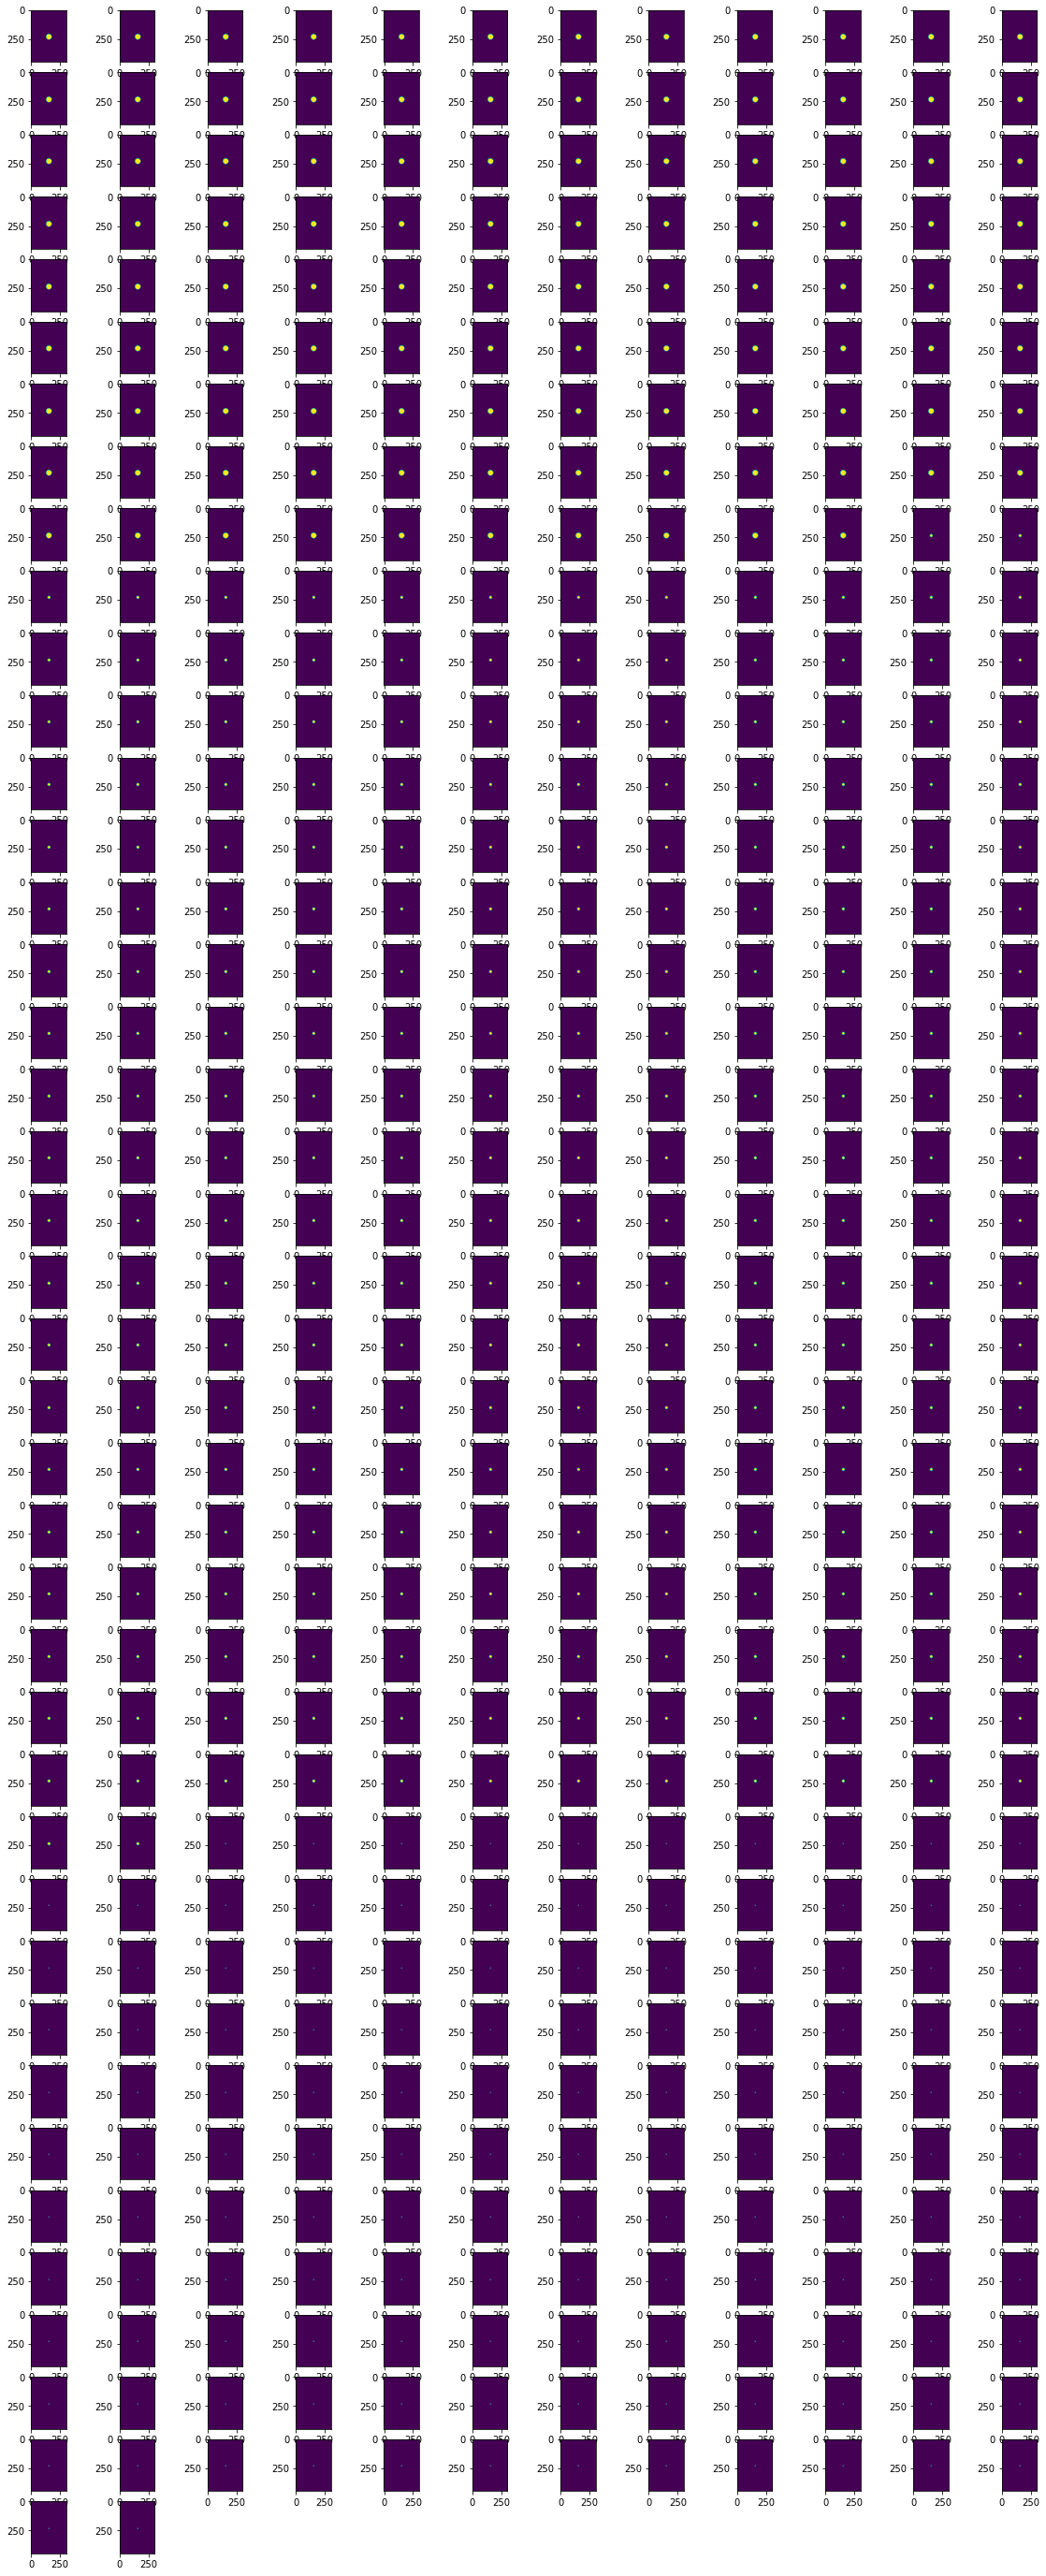

#6. 북극점 미관측지역을 결빙도 250으로 채워서 해빙 데이터에 더해준다.  

In [ ]:
thaw_pluse_pole = total_data[:,:,:,0] + total_data[:,:,:,1] * 250

In [ ]:
plt.figure(figsize =  (10, 10))  
plt.imshow(thaw_pluse_pole[0, :, :])
fig.show()

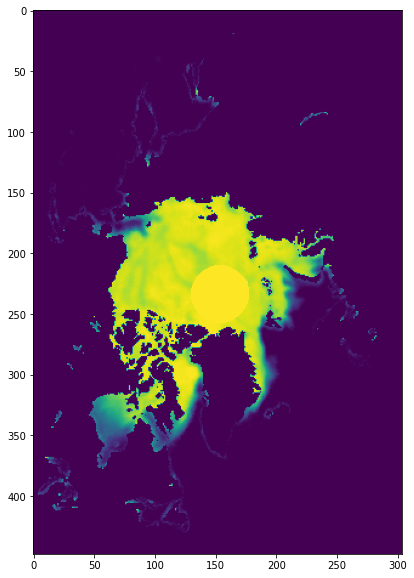

In [ ]:
thaw_pluse_pole = thaw_pluse_pole.reshape(thaw_pluse_pole.shape[0], thaw_pluse_pole.shape[1] * thaw_pluse_pole.shape[2])

In [ ]:
thaw_pluse_pole.shape

In [ ]:
thaw_pluse_pole_sum = []
thaw_pluse_pole_sum = np.array(thaw_pluse_pole.sum(axis=1))

#7. 미관측 영역을 결빙도 250으로 전부 채운후 그린 결빙도 합의 그래프  

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Thaw plus pole Changes over time (from 1978-11 to 2018-12)')
plt.plot(train['month'], thaw_pluse_pole_sum)
plt.show()

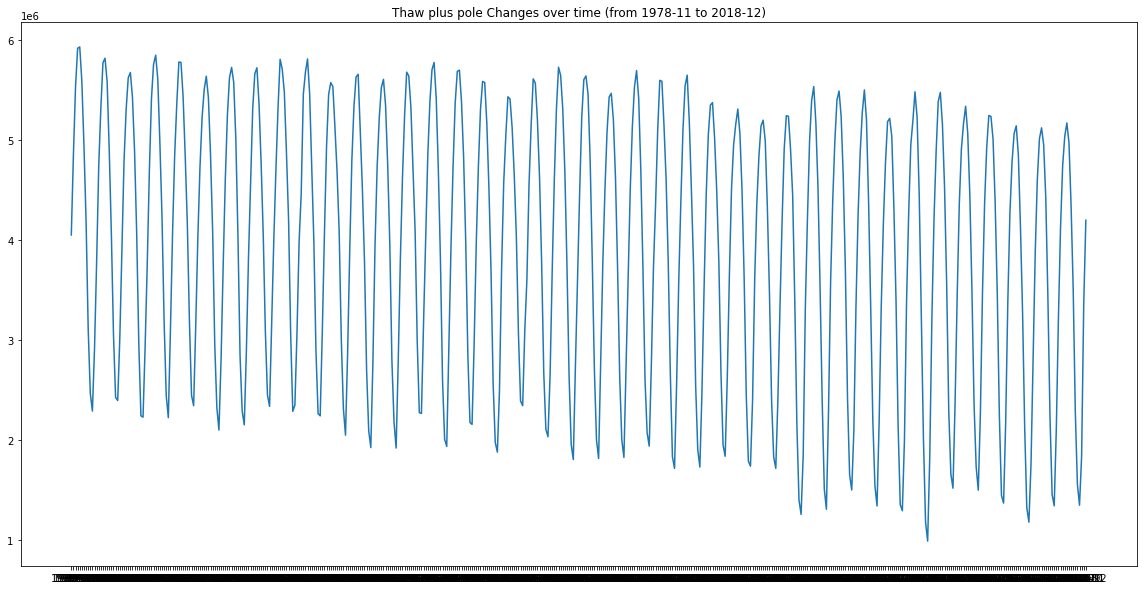

#8. 미관측영역을 채운 결빙도 합의 12개월 이동평균 그래프   
  
미관측영역을 임의로 채워서 정확하지는 않지만 대략적으로 빙하의 감소추세를 알 수 있다.

In [ ]:
moving_avg_plus_pole = moving_average_forecast(thaw_pluse_pole_sum, 12)

plt.figure(figsize = (20,10))
plt.title('Thaw Moving Average over time (from 1978-11 to 2018-12)')
plt.plot(train['month'][12:], moving_avg_plus_pole)
plt.show()

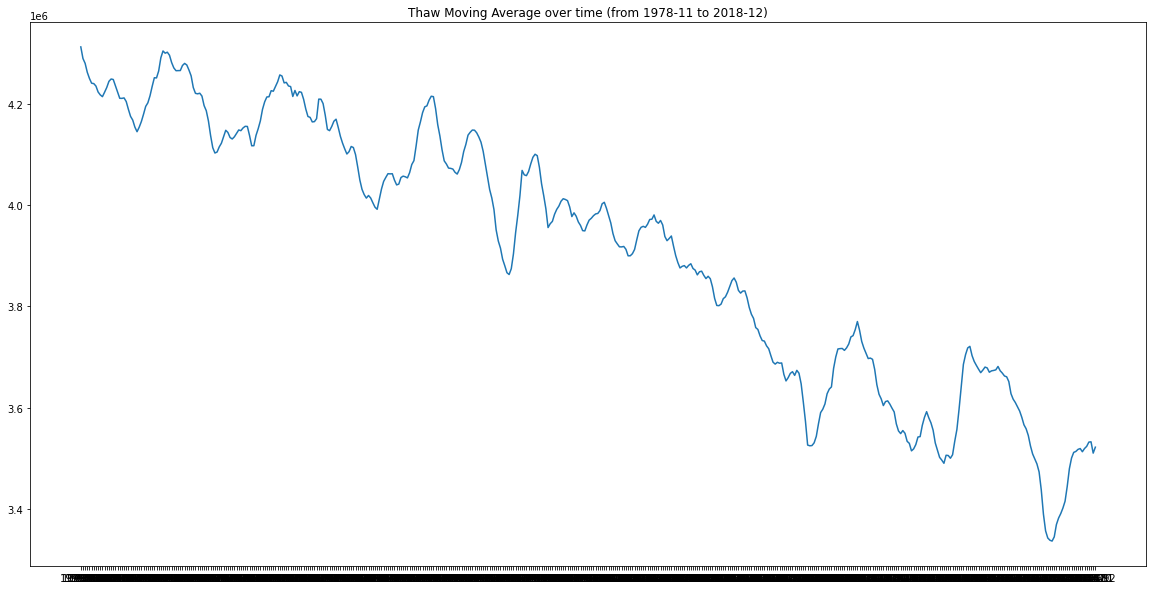